<tr>
<td align="left">
 <div align="left" style="margin-left: 80px;" >
   <font color="#21618C" size=10px >
   <b>Lets Grow More</b>
 <div align="left" style="margin-left: -20px;">       
   <font color="#21618C" size=6px>
   <b>Virtual Internship Program</b>
<td width="30%" align="left" > <img src="LGM logo.jpg"> 

<table align="left" style="margin-left: 80px;">
<td>
<font color="green" size=6px >            
<b>Data Analytics Internship</b>

## **Author:** Roshankumar S

## Time Series Forecasting - Stock Market Prediction using Stacked LSTM
* ##### [1. Time Series Forecasting](#introduction)
* ##### [2. Stacked LSTM](#kmeans)
* ##### [3. Problem Statement](#problem_statement)
* ##### [4. Objective](#objective)
* ##### [5. Dataset Description](#description)
* ##### [6. Data Dictionary](#dictionary)
* ##### [7. Prerequisite](#prerequisite)
* ##### [8. Understanding and summarizing dataset](#understanding)
* ##### [9. Data preparation](#preparation)
* ##### [10. Model Developement](#model_developement)
* ##### [11. Model Evaluation](#model_evaluation)
* ##### [12. Predict stock price for next 30 days](#prediction)
* ##### [13. Conclusion](#conclusion)

<a id="introduction"><a>
## Time Series Forecasting

<p style='text-align: justify; text-indent: 30px; max-width:950px;'>
Time series forecasting is a valuable tool that utilizes past data to predict future values of a variable. It aids in decision-making, resource planning, and identifying potential opportunities or risks. With advanced techniques like machine learning, forecasting models have become more accurate and adaptable, enabling businesses to make more informed and optimized decisions.
<p style='text-align: justify; text-indent: 30px; max-width:950px;'>
    The application of time series forecasting has been instrumental in various fields such as finance, economics, weather forecasting, and sales prediction. By analyzing patterns and seasonality in historical data, businesses can anticipate market trends and adjust strategies accordingly. These forecasting models continually evolve, incorporating advanced algorithms to handle complex relationships and improve accuracy, thus empowering organizations with valuable insights for effective planning and decision-making.    

<a id="kmeans"><a>
## Stacked LSTM

<p style='text-align: justify; text-indent: 30px; max-width:950px;'>
Stacked LSTM (Long Short-Term Memory) refers to a type of recurrent neural network (RNN) architecture that involves stacking multiple LSTM layers on top of each other. LSTM is a variant of RNN that addresses the vanishing gradient problem and is widely used for sequence data analysis, including time series forecasting.
<p style='text-align: justify; text-indent: 30px; max-width:950px;'>
In a stacked LSTM, each LSTM layer receives input from the previous layer and passes its output as input to the next layer. The lower layers capture lower-level temporal dependencies, while the higher layers learn more abstract representations and capture higher-level patterns in the data. This hierarchical structure allows stacked LSTMs to learn complex and long-term dependencies in time series data.

<a id="problem_statement"><a>
## Problem Statement

<p style='text-align: justify; text-indent: 30px; max-width:950px;'>
Create a robust stock market forecasting model using stacked LSTM to overcome the limitations of traditional methods and enhance accuracy. By employing the stacked LSTM architecture, develop a reliable model that can effectively analyze historical data, identify trends, and make accurate forecasts, enabling investors and traders to make informed decisions.

<a id="objective"><a>
## Objective

<p style='text-align: justify; text-indent: 30px; max-width:950px;'>
The objective of this project is to develop a stock market prediction and forecasting model using stacked LSTM to achieve higher accuracy and overcome the limitations of traditional forecasting methods. The aim is to leverage the power of deep learning and the hierarchical structure of stacked LSTM to capture complex patterns and long-term dependencies present in stock market data. By analyzing historical data, the objective is to build a reliable model that can accurately forecast future price movements, providing valuable insights to investors and traders for making informed decisions. The goal is to optimize portfolio management strategies and enhance overall performance in the dynamic and volatile stock market environment.

<a id="description"><a>
## Dataset Description

<p style='text-align: justify; text-indent: 30px; max-width:950px;'>
The provided CSV file contains a dataset titled "NSE-TATAGLOBAL" which represents the stock market data for the Tata Global Beverages Limited, traded on the National Stock Exchange (NSE). 
<p style='text-align: justify; text-indent: 30px; max-width:950px;'>
The dataset consists of historical stock market data for Tata Global Beverages Limited, spanning a period from January 2010 to August 2020. It includes a total of 2,504 data points, with each data point representing a specific trading day.

<a id="dictionary"><a>
## Data Dictionary

**Date:** The date of the trading day.

**Open:** The opening price of the stock on that trading day.

**High:** The highest price reached by the stock during the trading day.

**Low:** The lowest price reached by the stock during the trading day.

**Last:** The last traded price of the stock on that trading day.

**Close:** The closing price of the stock on that trading day.

**Total Trade Quantity:** The total number of shares traded on that trading day.

**Turnover (Lacs):** The total turnover (in lakhs) of the stock on that trading day.

<a id="prerequisite"><a>
## Prerequisite

### Import libraries

In [3]:
# Import numpy to perform mathematical operations on the dataset
import numpy as np
# Import pandas for storing , retrieving and manipulating 2-dimensional data in the form of table
import pandas as pd
# Import matplotlib for visualization tools
import matplotlib.pyplot as plt
# Import seaborn for better visualization methods
import seaborn as sns
# Import Min-Max Scaler for scaling the target variable
from sklearn.preprocessing import MinMaxScaler
# Import Sequential for model developement
from tensorflow.keras.models import Sequential
# Import Dense for Model developement
from tensorflow.keras.layers import Dense
# Import LSTM for training model and prediction
from tensorflow.keras.layers import LSTM
# Import mean squared error to evaluate the model
from sklearn.metrics import mean_squared_error

### Import dataset 

In [5]:
# Store URL of the csv file to a variable
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"

# Import data from csv file into data frame
data = pd.read_csv(url).iloc[::-1,].reset_index(drop=True)

<a id="understanding"><a>
## Understanding and summarizing dataset

In [6]:
# Check the length of the dataset
len(data)

2035

In [7]:
# Display top 5 observations of the dataset
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [8]:
# Get basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [9]:
# Get statistical data of the dataset which includes 5-point summary 
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [10]:
# Check if null values are present in the dataset
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

<a id="preparation"><a>
## Data Preparation

### Extract Target variable (closing price)

In [13]:
# Extract and display the target variable (close)
target = pd.DataFrame(data.Close)
target.head()

,Close
0,121.55
1,120.90
2,120.65
3,117.60
4,118.65


### Visualize Target variable 

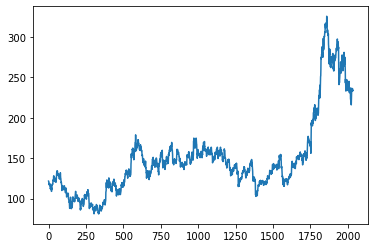

In [14]:
# Display the plot for the target variable
plt.plot(target)
plt.show()

### Scaling

In [16]:
# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Scale the target variable using the scaler
target["Scaled Data"] = scaler.fit_transform(target[["Close"]])

# Display top 5 observations
target.head()

,Close,Scaled Data
0,121.55,0.165850
1,120.90,0.163194
2,120.65,0.162173
3,117.60,0.149714
4,118.65,0.154003


### Train-Test Split

In [18]:
# Extract the first 70% data as train data
train = target.iloc[:int(0.7*(len(target))),1]

# Display top 5 observations of train data
train.head()

0    0.165850
1    0.163194
2    0.162173
3    0.149714
4    0.154003
Name: Scaled Data, dtype: float64

In [19]:
# Extract the next 30% data as test data
test = target.loc[int(0.7*(len(target))):,"Scaled Data"].reset_index(drop=True)

# Display top 5 observations of test data
test.head()

0    0.162173
1    0.159518
2    0.167075
3    0.159926
4    0.160539
Name: Scaled Data, dtype: float64

### Extract independent variables and target variable

In [20]:
# Initialize empty lists for independent and target variables of train dataset
X_train = []
y_train = []

# Extract 100 records as independent values and 101st record as target value over each iteration
for i in range(len(train)-100):
    X_train.append(list(train[i:i+100]))
    y_train.append(train[i+100])

In [21]:
# Initialize empty lists for independent and target variables of train dataset
X_test = []
y_test = []

# Extract 100 records as independent values and 101st record as target value over each iteration
for i in range(len(test)-100):
    X_test.append(list(test[i:i+100]))
    y_test.append(test[i+100])

<a id="model_developement"><a>
## Model Developement

In [26]:
# Initialize a sequential model using LSTM algorithm
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Train model

In [28]:
# Train model using train and test data
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 13s 229ms/step - loss: 0.0089 - val_loss: 0.0167
Epoch 2/100
21/21 [==============================] - 3s 146ms/step - loss: 0.0018 - val_loss: 0.0045
Epoch 3/100
21/21 [==============================] - 3s 146ms/step - loss: 0.0010 - val_loss: 0.0040
Epoch 4/100
21/21 [==============================] - 3s 145ms/step - loss: 8.6633e-04 - val_loss: 0.0056
Epoch 5/100
21/21 [==============================] - 3s 147ms/step - loss: 8.4053e-04 - val_loss: 0.0045
Epoch 6/100
21/21 [==============================] - 3s 149ms/step - loss: 8.2268e-04 - val_loss: 0.0043
Epoch 7/100
21/21 [==============================] - 3s 148ms/step - loss: 7.8984e-04 - val_loss: 0.0036
Epoch 8/100
21/21 [==============================] - 3s 147ms/step - loss: 7.7424e-04 - val_loss: 0.0036
Epoch 9/100
21/21 [==============================] - 3s 147ms/step - loss: 7.5573e-04 - val_loss: 0.0034
Epoch 10/100
21/21 [==============================] - 3s 146ms/ste

### Test model

In [29]:
# Predict train data
train_predict = model.predict(X_train)
# Predict test data
test_predict = model.predict(X_test)

16/16 [==============================] - 1s 29ms/step


In [30]:
# Convert predicted data into actual scale using inverse transform
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Test results

In [31]:
# Store results of train data
test_results1 = pd.DataFrame({"Predicted":train_predict.reshape(1324),"Observed":scaler.inverse_transform(np.array(y_train).reshape(-1,1)).reshape(-1)})

In [32]:
# Store results of test data
test_results2 = pd.DataFrame({"Predicted":test_predict.reshape(len(test_predict)),"Observed":scaler.inverse_transform(np.array(y_test).reshape(-1,1)).reshape(-1)})

In [33]:
# Concatenate both results of prediction of train data and test data
test_results = pd.concat([test_results1,test_results2]).reset_index()

### Visualize test results

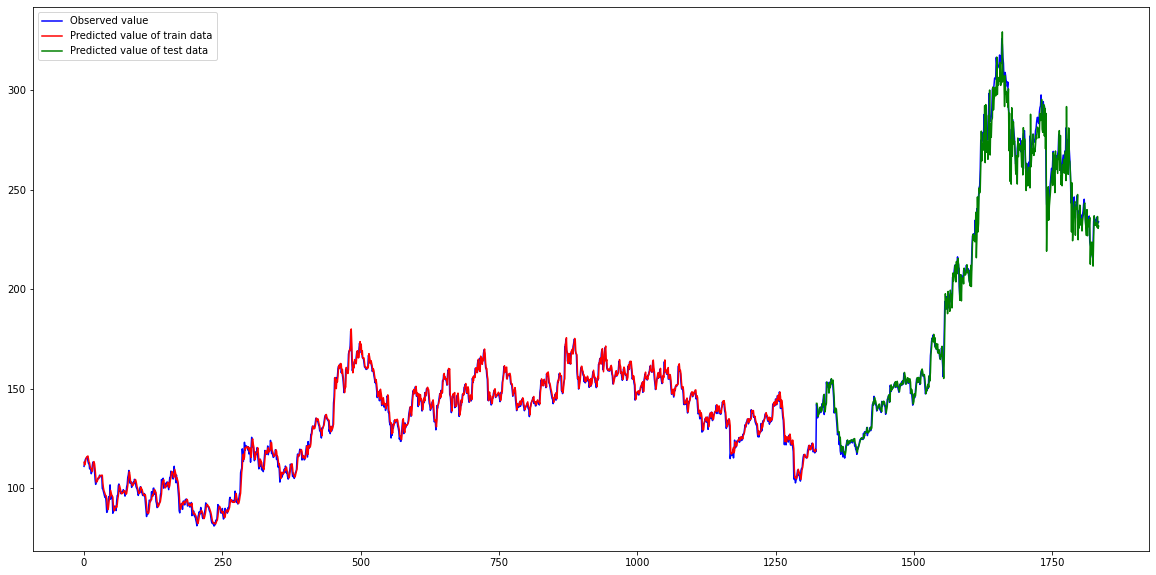

In [34]:
# Adjust plot size for better visualization
plt.figure(figsize=(20,10))

# Plot curve for oberverved values
plt.plot(test_results["Observed"],c="b",label="Observed value")
# Plot curve for predicted value of train data
plt.plot(test_results["Predicted"].iloc[:1324],c="red",label="Predicted value of train data")
# Plot curve for predicted value of test data
plt.plot(test_results["Predicted"].iloc[1324:],c="g",label="Predicted value of test data")

# Display legend for the plot
plt.legend()
# Display the plot
plt.show()

<a id="model_evaluation"><a>
## Model Evaluation

In [37]:
# Compute Mean squared error train data  
print("Mean squared error for train data : " , (mean_squared_error(y_train,train_predict))**0.5)

Mean squared error for train data :  134.07841123429196


In [38]:
# Compute Mean squared error test data  
print("Mean squared error for test data : " , (mean_squared_error(y_test,test_predict))**0.5)

Mean squared error for test data :  210.82950689864774


<a id="prediction"><a>
## Prediction of next month prices

### Initialize values for prediction

In [39]:
# Store input values of prediction
predict_input = test.iloc[-100:].values.tolist()
# Create empty list to store output values of prediction
predict_output = []
# Create list to store both input and output data
predict_data = predict_input.copy()

In [40]:
# Iterate for loop to predict prices of 30 successive days
for i in range(30):
    # Pass 100 values as input
    step_input = predict_data[-100:]
    # Predict 101st value using developed model
    step_output = model.predict([list(step_input)],verbose=0).reshape(1)
    # Add the predicted value to the input value
    predict_data.extend(step_output)
    # Store the output values in a list
    predict_output.extend(step_output)

### Transform predicted values

In [41]:
# Transform input data
input_data = scaler.inverse_transform(np.array(predict_input).reshape(-1,1)).reshape(-1)
# Transform output data
predicted = scaler.inverse_transform(np.array(predict_output).reshape(-1,1)).reshape(-1)

## Visualization of predicted values

### Visualize predicted prices of next 30 days along with previous prices of 100 days

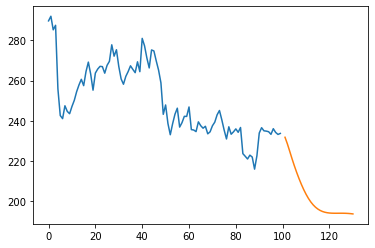

In [42]:
# Plot a curve for previous prices
plt.plot(input_data)
# Plot a curve for predicted prices
sns.lineplot(x=np.arange(101,131),y=predicted)
# Display the plot
plt.show()

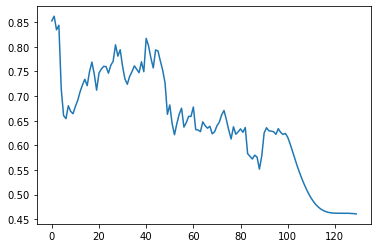

In [43]:
# Plot prices of 130 days
plt.plot(predict_data)
plt.show()

### Visualize predicted prices of next 30 days along with previous price history 

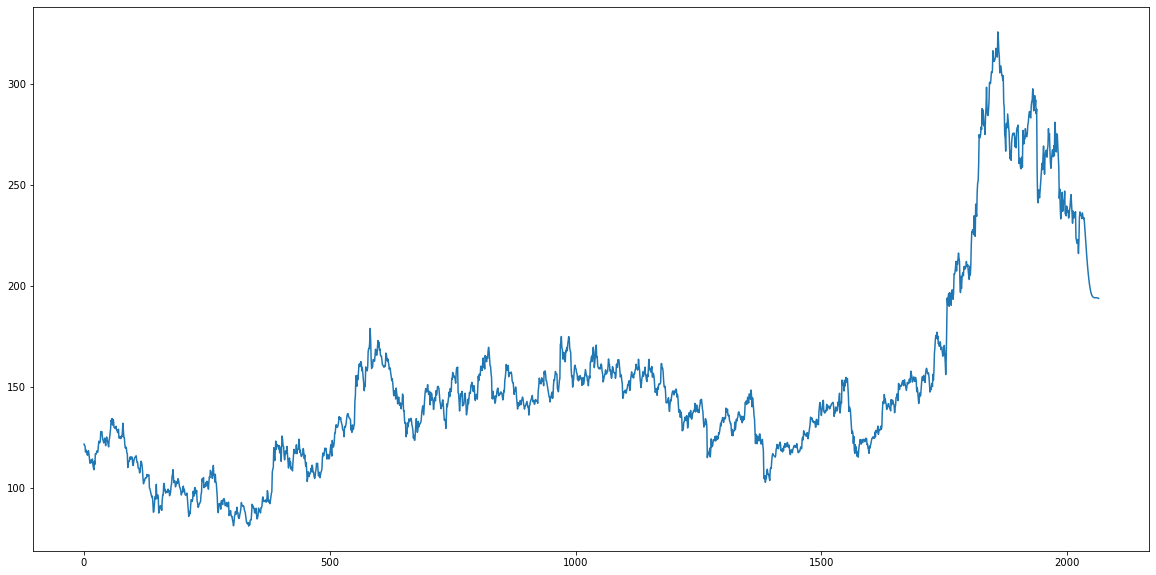

In [45]:
# Store target values of entire given dataset
Close_history = list(data.Close)
# Add predicted values to the previous values
Close_history.extend(predicted)

# Adjust plot size for better visualization
plt.figure(figsize=(20,10))
# Plot curve for historic values as well as predicted values
plt.plot(Close_history)
# Display the plot
plt.show()

<a id="conclusion"><a>
## Conclusion

<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
In conclusion, the project aimed to develop a stock market prediction and forecasting model using stacked LSTM to improve accuracy and overcome the limitations of traditional methods. The dataset, which contained historical stock market data for Tata Global Beverages Limited, provided valuable insights into the price movements and trading volumes of the company's stock.
<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
By leveraging the power of deep learning and the hierarchical structure of stacked LSTM, the developed model successfully captured complex patterns and long-term dependencies present in the stock market data. It accurately predicted future price movements, enabling investors and traders to make informed decisions and optimize their portfolio management strategies.
<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
The project's findings highlighted the effectiveness of stacked LSTM in handling the dynamic and volatile nature of stock market data. By considering historical trends and trading volumes, the model provided valuable insights into the stock's performance, aiding in risk assessment and market timing.
<p style='text-align: justify; max-width:950px; text-indent: 30px;'>
Overall, the project demonstrated the potential of stacked LSTM for stock market prediction and forecasting, contributing to improved decision-making in the dynamic and competitive stock market environment. It opens avenues for further research and advancements in utilizing deep learning techniques to enhance stock market analysis and trading strategies.